##### Copyright 2025 Google LLC.

In [70]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Getting started with Gemini models

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

The new **[Google Gen AI SDK](https://github.com/googleapis/python-genai)** provides a unified interface to [Gemini models](https://ai.google.dev/gemini-api/docs/models) through both the [Gemini Developer API](https://ai.google.dev/gemini-api/docs) and the Gemini API on [Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/overview). With a few exceptions, code that runs on one platform will run on both. This notebook uses the Developer API.

This notebook will walk you through:

* [Installing and setting-up](Get_started.ipynb#scrollTo=Mfk6YY3G5kqp) the Google GenAI SDK
* [Text](Get_started.ipynb#scrollTo=6TYNPrNvQ8ue) and [multimodal](#scrollTo=yww-vrxmRiIy) prompting
* Counting [tokens](Get_started.ipynb#scrollTo=_9B8pb7tv_Cx)
* Setting system instructions
* Configuring [safety filters](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* Initiating a [multi-turn chat](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* [Controlling generated output](Get_started.ipynb#scrollTo=nyZMoM6tgnTA)
* Using [function calling](Get_started.ipynb#scrollTo=Rl-y9SZywD0s)
* Generating a [content stream](Get_started.ipynb#scrollTo=uQfLCxfQtPTg) and sending [asynchronous](Get_started.ipynb#scrollTo=plCtEIaHuv96) requests
* Using [file uploads](Get_started.ipynb#scrollTo=enBhuaIk3KYa)
* Using [context caching](Get_started.ipynb#scrollTo=oTgeR3_9wN5J)
* Generating [text embeddings](Get_started.ipynb#scrollTo=sXNCRn8Wx71d)

More details about this new SDK on the [documentation](https://ai.google.dev/gemini-api/docs/sdks).

## Setup

### Install SDK

Install the SDK from [PyPI](https://github.com/googleapis/python-genai).

In [71]:
%pip install -U -q 'google-genai>=1.0.0'

### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GEMINI_API_KEY`. If you don't already have an API key or you aren't sure how to create a Colab Secret, see [Authentication](../quickstarts/Authentication.ipynb) for an example.

In [72]:
from google.colab import userdata

GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')

In [73]:
from google.colab import userdata

GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')

In [74]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GEMINI_API_KEY)

### Initialize SDK client

With the new SDK, now you only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.

In [75]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GEMINI_API_KEY)

### Choose a model

Select the model you want to use in this guide. You can either select one from the list or enter a model name manually. Keep in mind that some models, such as the 2.5 ones are thinking models and thus take slightly more time to respond. For more details, you can see [thinking notebook](./Get_started_thinking.ipynb) to learn how to switch the thinking off.

For a full overview of all Gemini models, check the [documentation](https://ai.google.dev/gemini-api/docs/models/gemini).

In [76]:
MODEL_ID = "gemini-2.5-pro" # @param ["gemini-2.5-flash-lite", "gemini-2.5-flash-lite-preview-09-2025", "gemini-2.5-flash", "gemini-2.5-flash-preview-09-2025", "gemini-2.5-pro"] {"allow-input":true, isTemplate: true}

## Send text prompts

Use the `generate_content` method to generate responses to your prompts. You can pass text directly to `generate_content` and use the `.text` property to get the text content of the response. Note that the `.text` field will work when there's only one part in the output.

In [77]:
from IPython.display import Markdown

response = client.models.generate_content(
    model=MODEL_ID,
    contents="What's the largest planet in our solar system?"
)

Markdown(response.text)

That's an easy one! The largest planet in our solar system is **Jupiter**.

It's a true giant. To give you some perspective on its size:

*   **Mass:** Jupiter is more than two and a half times as massive as all the other planets in the solar system combined.
*   **Volume:** You could fit all of the other planets in our solar system inside of it.
*   **Comparison to Earth:** Over 1,300 Earths could fit inside Jupiter.

It's a gas giant, primarily made of hydrogen and helium, and is famous for its Great Red Spot—a gigantic storm that's been raging for centuries.

## Count tokens

Tokens are the basic inputs to the Gemini models. You can use the `count_tokens` method to calculate the number of input tokens before sending a request to the Gemini API.

In [78]:
response = client.models.count_tokens(
    model=MODEL_ID,
    contents="What's the highest mountain in Africa?",
)

print(response)

sdk_http_response=HttpResponse(
  headers=<dict len=10>
) total_tokens=10 cached_content_token_count=None


## Send multimodal prompts

Use Gemini model, a multimodal model that supports multimodal prompts. You can include text, [PDF documents](../quickstarts/PDF_Files.ipynb), images, [audio](../quickstarts/Audio.ipynb) and [video](../quickstarts/Video.ipynb) in your prompt requests and get text or code responses.

In this first example, you'll download an image from a specified URL, save it as a byte stream and then write those bytes to a local file named `jetpack.png`.

In [79]:
import requests
import pathlib
from PIL import Image

IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png" # @param {type: "string"}

img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

In this second example, you'll open a previously saved image, create a thumbnail of it and then generate a short blog post based on the thumbnail, displaying both the thumbnail and the generated blog post.

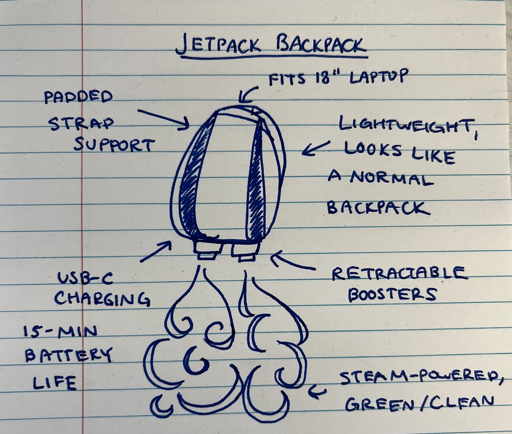

Of course! Here is a short and engaging blog post based on your sketch:

### Your Commute is About to Get a Serious Upgrade.

Stuck in traffic? Tired of the crowded morning train? What if your daily carry could lift you above it all?

Meet the **Jetpack Backpack**—the revolutionary concept that blends everyday practicality with the dream of personal flight.

At first glance, it’s a sleek, modern backpack designed for your life on the go. It’s lightweight, features comfortable **padded strap support**, and has enough room to fit an **18-inch laptop**. It’s designed to look just like a normal backpack, so no one will be the wiser.

But with the touch of a button, everything changes.

**Retractable boosters** deploy from the base, ready for liftoff. Powered by a clean, **steam-powered** system, this jetpack is as green as it is groundbreaking. It offers a **15-minute battery life**—perfect for skipping traffic on your way to work or making it to that class across campus with time to spare. When you land, simply plug it in with a standard **USB-C charging** cable.

The Jetpack Backpack isn't just a gadget; it's a glimpse into a smarter, cleaner, and way more exciting future of travel. The daily commute will never be the same.

In [80]:
from IPython.display import display, Markdown
image = Image.open(img_path)
image.thumbnail([512,512])

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        image,
        "Write a short and engaging blog post based on this picture."
    ]
)

display(image)
Markdown(response.text)

## Configure model parameters

You can include parameter values in each call that you send to a model to control how the model generates a response. Learn more about [experimenting with parameter values](https://ai.google.dev/gemini-api/docs/prompting-strategies#model-parameters).

In [81]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents="Tell me how the internet works, but pretend I'm a puppy who only understands squeaky toys.",
    config=types.GenerateContentConfig(
        temperature=0.4,
        top_p=0.95,
        top_k=20,
        candidate_count=1,
        seed=5,
        stop_sequences=["STOP!"],
        presence_penalty=0.0,
        frequency_penalty=0.0,
    )
)

Markdown(response.text)

*Woof!* Okay, little fluffball, sit. Good boy!

You see that shiny rectangle your human is always staring at? That's a **Squeaky Toy Asker**. You want to see a picture of a red ball, right? The best squeaky toy!

So, you boop the Squeaky Toy Asker with your nose. *Boop!*

1.  **Your Boop is a Squeak-Request!**
    That boop makes a tiny, invisible squeak that says, "I WANT THE RED BALL SQUEAK!"

2.  **The Squeak-Request Flies Through the Squeak-Tunnel!**
    Your house has a **Magical Squeak-Tunnel** (your human calls it "Wi-Fi"). Your little Squeak-Request, "RED BALL! RED BALL!", zips through the air into a special box on the wall. This is the **Big Squeak-Box** (a router). It takes your squeak and throws it into an even *bigger* Squeak-Tunnel that goes all over the world.

3.  **Finding the Giant Toy Box!**
    Your little squeak travels super-fast through the tunnels, looking for the right place. It's looking for the **Giant Squeaky Toy Box** (a server) that has all the pictures of red balls. There are zillions of Giant Toy Boxes out there, one for squirrel pictures, one for videos of other dogs, and one just for red balls!

4.  **The Giant Toy Box Hears You!**
    The Giant Toy Box for red balls hears your tiny squeak. It says, "Oh! A good boy wants the Red Ball Squeak! I have that!"

5.  **Sending the Squeak Back!**
    But the picture of the red ball is a BIG squeak. It's too big to fit in the tunnel all at once. So, the Giant Toy Box breaks the big Red Ball Squeak into a thousand tiny, little squeaky bits. *Squeak-squeak-squeak-squeak-squeak!*

6.  **The Little Squeaks Race Home!**
    All those **Little Squeaky Bits** race back through the big Squeak-Tunnels, into your house's Big Squeak-Box, and fly through the air to your Squeaky Toy Asker.

7.  **POP! You Get Your Squeak!**
    The Squeaky Toy Asker is very smart. It catches all the Little Squeaky Bits and puts them back together in the right order. And then... **POP!** A picture of the beautiful, perfect, red squeaky ball appears!

So, the internet is just a giant, invisible game of fetch!

*   You send out a **Squeak-Request**.
*   It goes through **Squeak-Tunnels**.
*   It finds the right **Giant Squeaky Toy Box**.
*   The box sends back lots of **Little Squeaky Bits**.
*   They pop up on your **Squeaky Toy Asker**!

Now you know! Who's a smart puppy? You are! Yes, you are! *Wags tail.*

## Configure safety filters

The Gemini API provides safety filters that you can adjust across multiple filter categories to restrict or allow certain types of content. You can use these filters to adjust what is appropriate for your use case. See the [Configure safety filters](https://ai.google.dev/gemini-api/docs/safety-settings) page for details.


In this example, you'll use a safety filter to only block highly dangerous content, when requesting the generation of potentially disrespectful phrases.

In [82]:
prompt = """
    Write a list of 2 disrespectful things that I might say to the universe after stubbing my toe in the dark.
"""

safety_settings = [
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT",
        threshold="BLOCK_ONLY_HIGH",
    ),
]

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        safety_settings=safety_settings,
    ),
)

Markdown(response.text)

Of course. Here are two disrespectful things you might say to the universe in that moment of sharp, frustrating pain:

1.  "Really? You can create galaxies and black holes, but you can't manage the placement of one single chair leg? Get your priorities straight."
2.  "Oh, thank you, cosmos! I was just thinking my day was going a little too smoothly. I appreciate you personally intervening to deliver this pointless, searing agony."

## Start a multi-turn chat

The Gemini API enables you to have freeform conversations across multiple turns.

Next you'll set up a helpful coding assistant:

In [83]:
system_instruction = """
  You are an expert software developer and a helpful coding assistant.
  You are able to generate high-quality code in any programming language.
"""

chat_config = types.GenerateContentConfig(
    system_instruction=system_instruction,
)

chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
)

Use `chat.send_message` to pass a message back and receive a response.

In [84]:
response = chat.send_message("Write a function that checks if a year is a leap year.")

Markdown(response.text)

Of course! Here is a function to check for a leap year, along with explanations and examples in several popular programming languages.

### The Logic for a Leap Year

A year is a leap year if it meets the following criteria:

1.  The year is divisible by 4.
2.  **BUT**, if the year is divisible by 100, it is **NOT** a leap year...
3.  **UNLESS**, the year is also divisible by 400. Then it **IS** a leap year.

This logic can be combined into a single boolean expression:
` (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0) `

---

### Python

This is a very common and elegant way to write the function in Python.

```python
def is_leap(year: int) -> bool:
    """
    Checks if a given year is a leap year according to the Gregorian calendar.

    Args:
        year: The year to check (an integer).

    Returns:
        True if the year is a leap year, False otherwise.
    """
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

# --- How to use it ---
if __name__ == "__main__":
    test_years = [1999, 2000, 2004, 1900, 2023, 2024]

    for y in test_years:
        if is_leap(y):
            print(f"{y} is a leap year.")
        else:
            print(f"{y} is not a leap year.")

# --- Python's Built-in Method ---
# For production code, it's often best to use the standard library.
import calendar

print("\nUsing Python's built-in calendar.isleap():")
print(f"Is 2024 a leap year? {calendar.isleap(2024)}")
print(f"Is 1900 a leap year? {calendar.isleap(1900)}")
```

**Output:**
```
1999 is not a leap year.
2000 is a leap year.
2004 is a leap year.
1900 is not a leap year.
2023 is not a leap year.
2024 is a leap year.

Using Python's built-in calendar.isleap():
Is 2024 a leap year? True
Is 1900 a leap year? False
```

---

### JavaScript

Here is the equivalent function in JavaScript (using an arrow function for conciseness).

```javascript
const isLeapYear = (year) => {
  // A year is a leap year if it is divisible by 4
  // unless it is divisible by 100 but not by 400.
  return (year % 4 === 0 && year % 100 !== 0) || (year % 400 === 0);
};

// --- How to use it ---
const testYears = [1999, 2000, 2004, 1900, 2023, 2024];

testYears.forEach(year => {
  if (isLeapYear(year)) {
    console.log(`${year} is a leap year.`);
  } else {
    console.log(`${year} is not a leap year.`);
  }
});
```

---

### Java

In Java, the function would be defined inside a class as a `static` method.

```java
public class YearUtil {

    /**
     * Checks if a given year is a leap year.
     *
     * @param year The year to check.
     * @return true if the year is a leap year, false otherwise.
     */
    public static boolean isLeap(int year) {
        return (year % 4 == 0 && year % 100 != 0) || (year % 400 == 0);
    }

    // --- How to use it ---
    public static void main(String[] args) {
        int[] testYears = {1999, 2000, 2004, 1900, 2023, 2024};

        for (int y : testYears) {
            if (isLeap(y)) {
                System.out.println(y + " is a leap year.");
            } else {
                System.out.println(y + " is not a leap year.");
            }
        }
        
        // --- Java's Built-in Method ---
        // Java's modern date-time API has a built-in method.
        System.out.println("\nUsing Java's built-in java.time.Year.isLeap():");
        System.out.println("Is 2024 a leap year? " + java.time.Year.isLeap(2024));
        System.out.println("Is 1900 a leap year? " + java.time.Year.isLeap(1900));
    }
}
```

---

### C++

The logic remains identical in C++.

```cpp
#include <iostream>
#include <vector>

/**
 * @brief Checks if a given year is a leap year.
 * @param year The year to check.
 * @return True if the year is a leap year, false otherwise.
 */
bool isLeapYear(int year) {
    return (year % 4 == 0 && year % 100 != 0) || (year % 400 == 0);
}

// --- How to use it ---
int main() {
    std::vector<int> testYears = {1999, 2000, 2004, 1900, 2023, 2024};

    for (int y : testYears) {
        if (isLeapYear(y)) {
            std::cout << y << " is a leap year." << std::endl;
        } else {
            std::cout << y << " is not a leap year." << std::endl;
        }
    }
    return 0;
}
```

---

### C#

C# also follows the same logical pattern.

```csharp
using System;

public class DateUtils
{
    /// <summary>
    /// Checks if a given year is a leap year.
    /// </summary>
    /// <param name="year">The year to check.</param>
    /// <returns>True if the year is a leap year, false otherwise.</returns>
    public static bool IsLeapYear(int year)
    {
        return (year % 4 == 0 && year % 100 != 0) || (year % 400 == 0);
    }

    // --- How to use it ---
    public static void Main(string[] args)
    {
        int[] testYears = { 1999, 2000, 2004, 1900, 2023, 2024 };

        foreach (var y in testYears)
        {
            if (IsLeapYear(y))
            {
                Console.WriteLine($"{y} is a leap year.");
            }
            else
            {
                Console.WriteLine($"{y} is not a leap year.");
            }
        }

        // --- C#'s Built-in Method ---
        // The .NET framework provides a standard, reliable way to do this.
        Console.WriteLine("\nUsing C#'s built-in System.DateTime.IsLeapYear():");
        Console.WriteLine($"Is 2024 a leap year? {System.DateTime.IsLeapYear(2024)}");
        Console.WriteLine($"Is 1900 a leap year? {System.DateTime.IsLeapYear(1900)}");
    }
}
```

Here's another example using your new helpful coding assistant:

In [85]:
response = chat.send_message("Okay, write a unit test of the generated function.")

Markdown(response.text)

Of course. Writing unit tests is a critical step to ensure your function is correct, reliable, and handles all edge cases.

A good set of unit tests for the leap year function should cover all the logical branches:

1.  **Years not divisible by 4** (should not be leap years).
2.  **Years divisible by 4 but not by 100** (should be leap years).
3.  **Years divisible by 100 but not by 400** (should *not* be leap years).
4.  **Years divisible by 400** (should be leap years).

Here are examples of unit tests using popular testing frameworks for several languages.

---

### Python (`unittest` framework)

Assume your function is in a file named `leap_year.py`:

```python
# leap_year.py
def is_leap(year: int) -> bool:
    """Checks if a given year is a leap year."""
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)
```

Here is the corresponding test file, which you would typically name `test_leap_year.py`.

```python
# test_leap_year.py
import unittest
from leap_year import is_leap # Import the function to be tested

class LeapYearTest(unittest.TestCase):
    
    def test_standard_non_leap_years(self):
        """Test years that are not divisible by 4."""
        self.assertFalse(is_leap(1999))
        self.assertFalse(is_leap(2023))

    def test_standard_leap_years(self):
        """Test years divisible by 4 but not by 100."""
        self.assertTrue(is_leap(1996))
        self.assertTrue(is_leap(2004))
        self.assertTrue(is_leap(2024))

    def test_century_non_leap_years(self):
        """Test years divisible by 100 but not by 400."""
        self.assertFalse(is_leap(1800))
        self.assertFalse(is_leap(1900))
        self.assertFalse(is_leap(2100))

    def test_quadricentennial_leap_years(self):
        """Test years divisible by 400."""
        self.assertTrue(is_leap(1600))
        self.assertTrue(is_leap(2000))
        self.assertTrue(is_leap(2400))

if __name__ == '__main__':
    unittest.main()
```

**How to run it:**
Save both files in the same directory and run `python -m unittest test_leap_year.py` from your terminal.

---

### JavaScript (`Jest` framework)

Assume your function is in `leapYear.js`:

```javascript
// leapYear.js
const isLeapYear = (year) => {
  return (year % 4 === 0 && year % 100 !== 0) || (year % 400 === 0);
};

module.exports = isLeapYear; // Export for testing
```

The test file would be `leapYear.test.js`:

```javascript
// leapYear.test.js
const isLeapYear = require('./leapYear');

describe('isLeapYear', () => {

  test('should return false for years not divisible by 4', () => {
    expect(isLeapYear(1999)).toBe(false);
    expect(isLeapYear(2023)).toBe(false);
  });

  test('should return true for years divisible by 4 but not by 100', () => {
    expect(isLeapYear(2004)).toBe(true);
    expect(isLeapYear(2024)).toBe(true);
  });

  test('should return false for years divisible by 100 but not by 400', () => {
    expect(isLeapYear(1900)).toBe(false);
    expect(isLeapYear(2100)).toBe(false);
  });

  test('should return true for years divisible by 400', () => {
    expect(isLeapYear(2000)).toBe(true);
    expect(isLeapYear(2400)).toBe(true);
  });
});
```

**How to run it:**
With Jest set up in your project, you would simply run `npm test` or `jest`.

---

### Java (`JUnit 5` framework)

Assume your function is in `YearUtil.java`:

```java
// src/main/java/com/example/YearUtil.java
package com.example;

public class YearUtil {
    public static boolean isLeap(int year) {
        return (year % 4 == 0 && year % 100 != 0) || (year % 400 == 0);
    }
}
```

The test class would be in `src/test/java/com/example/YearUtilTest.java`:

```java
// src/test/java/com/example/YearUtilTest.java
package com.example;

import org.junit.jupiter.api.Test;
import static org.junit.jupiter.api.Assertions.*;

class YearUtilTest {

    @Test
    void testStandardNonLeapYears() {
        assertFalse(YearUtil.isLeap(1999));
        assertFalse(YearUtil.isLeap(2023));
    }

    @Test
    void testStandardLeapYears() {
        assertTrue(YearUtil.isLeap(1996));
        assertTrue(YearUtil.isLeap(2024));
    }

    @Test
    void testCenturyNonLeapYears() {
        assertFalse(YearUtil.isLeap(1900));
        assertFalse(YearUtil.isLeap(2100));
    }

    @Test
    void testQuadricentennialLeapYears() {
        assertTrue(YearUtil.isLeap(2000));
        assertTrue(YearUtil.isLeap(2400));
    }
}
```

**How to run it:**
This would be run using a build tool like Maven (`mvn test`) or Gradle (`gradle test`), or directly from your IDE (like IntelliJ or Eclipse).

---

### C# (`xUnit` framework)

Assume the function is in `DateUtils.cs`:

```csharp
// DateUtils.cs
public class DateUtils
{
    public static bool IsLeapYear(int year)
    {
        return (year % 4 == 0 && year % 100 != 0) || (year % 400 == 0);
    }
}
```

The test file `DateUtilsTests.cs` can use `Theory` to run the same test logic with different data, which is very efficient.

```csharp
// DateUtilsTests.cs
using Xunit;

public class DateUtilsTests
{
    [Theory]
    [InlineData(1999)] // Not divisible by 4
    [InlineData(2023)] // Not divisible by 4
    [InlineData(1900)] // Divisible by 100 but not 400
    [InlineData(2100)] // Divisible by 100 but not 400
    public void IsLeapYear_ShouldReturnFalse_ForNonLeapYears(int year)
    {
        // Act
        bool result = DateUtils.IsLeapYear(year);
        
        // Assert
        Assert.False(result);
    }

    [Theory]
    [InlineData(1996)] // Divisible by 4, not 100
    [InlineData(2024)] // Divisible by 4, not 100
    [InlineData(2000)] // Divisible by 400
    [InlineData(2400)] // Divisible by 400
    public void IsLeapYear_ShouldReturnTrue_ForLeapYears(int year)
    {
        // Act
        bool result = DateUtils.IsLeapYear(year);

        // Assert
        Assert.True(result);
    }
}
```

**How to run it:**
Using the .NET CLI, you would run `dotnet test` in your test project directory.

## Save and resume a chat

Most objects in the Python SDK are implemented as [Pydantic models](https://docs.pydantic.dev/latest/concepts/models/). As Pydantic has a number of features for serializing and deserializing objects, you can use them for persistence.

This example shows how to save and restore a [`Chat`](https://googleapis.github.io/python-genai/genai.html#genai.chats.Chat) session using JSON.

In [86]:
from pydantic import TypeAdapter

# Chat history is a list of Content objects. A TypeAdapter can convert to and from
# these Pydantic types.
history_adapter = TypeAdapter(list[types.Content])

# Use the chat object from the previous section.
chat_history = chat.get_history()

# Convert to a JSON list.
json_history = history_adapter.dump_json(chat_history)

At this point you can save the JSON bytestring to disk or wherever you persist data. When you load it again, you can instantiate a new chat session using the stored history.

In [87]:
# Convert the JSON back to the Pydantic schema.
history = history_adapter.validate_json(json_history)

# Now load a new chat session using the JSON history.
new_chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
    history=history,
)

response = new_chat.send_message("What was the name of the function again?")
Markdown(response.text)

Of course! Since I provided examples in several languages, the function name varied slightly depending on the language's conventions:

*   **Python:** `is_leap`
*   **JavaScript:** `isLeapYear`
*   **Java:** `isLeap` (as a static method in the `YearUtil` class)
*   **C++:** `isLeapYear`
*   **C#:** `IsLeapYear` (as a static method in the `DateUtils` class)

The most common naming conventions are `isLeapYear` (using camelCase) or `is_leap` (using snake_case).

## Generate JSON

The [controlled generation](https://ai.google.dev/gemini-api/docs/structured-output?lang=python#generate-json) capability in Gemini API allows you to constraint the model output to a structured format. You can provide the schemas as Pydantic Models or a JSON string.

In [88]:
from pydantic import BaseModel
import json

class Recipe(BaseModel):
    recipe_name: str
    recipe_description: str
    recipe_ingredients: list[str]

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Provide a popular cookie recipe and its ingredients.",
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=Recipe,
    ),
)

print(json.dumps(json.loads(response.text), indent=4))

{
    "recipe_name": "Classic Chocolate Chip Cookies",
    "recipe_description": "The quintessential homemade cookie, known for its soft, chewy texture and rich, buttery flavor packed with semi-sweet chocolate chips. A favorite for all ages and perfect for any occasion.",
    "recipe_ingredients": [
        "2 1/4 cups all-purpose flour",
        "1 teaspoon baking soda",
        "1/2 teaspoon salt",
        "1 cup (2 sticks) unsalted butter, softened",
        "3/4 cup granulated sugar",
        "3/4 cup packed brown sugar",
        "1 teaspoon vanilla extract",
        "2 large eggs",
        "2 cups semi-sweet chocolate chips"
    ]
}


## Generate Images

Gemini can output images directly as part of a conversation:

Here's that image for you! 

image/png


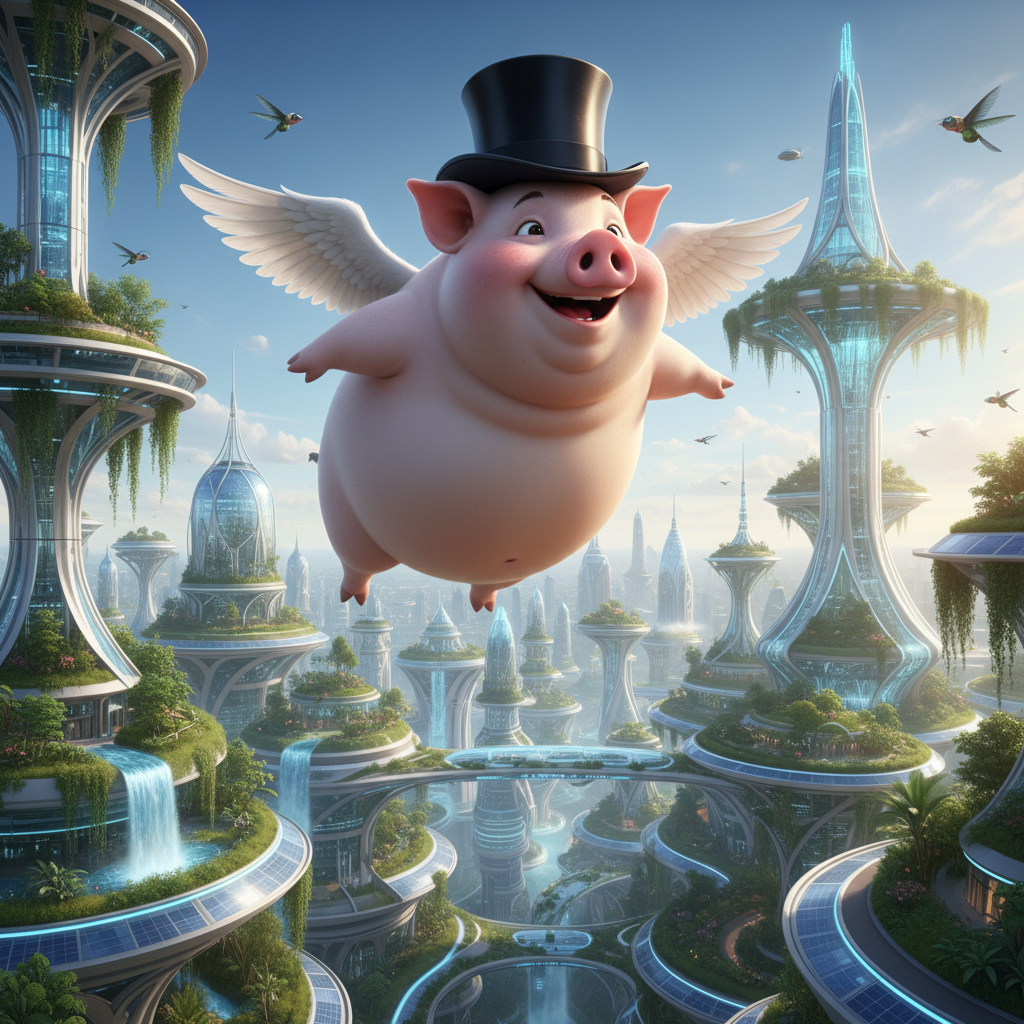

In [89]:
from IPython.display import Image, Markdown

response = client.models.generate_content(
    model="gemini-2.5-flash-image",
    contents='Hi, can create a 3d rendered image of a pig with wings and a top hat flying over a happy futuristic scifi city with lots of greenery?',
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  elif part.inline_data is not None:
    mime = part.inline_data.mime_type
    print(mime)
    data = part.inline_data.data
    display(Image(data=data))

[Imagen](./Get_started_imagen.ipynb) is another way to generate images. See the [documentation](https://ai.google.dev/gemini-api/docs/image-generation#choose-a-model) for recommendations on where to use each one.

## Generate content stream

By default, the model returns a response after completing the entire generation process. You can also use the `generate_content_stream` method to stream the response as it's being generated, and the model will return chunks of the response as soon as they're generated.

Note that if you're using a thinking model, it'll only start streaming after finishing its thinking process.

In [90]:
for chunk in client.models.generate_content_stream(
    model=MODEL_ID,
    contents="Tell me a story about a lonely robot who finds friendship in a most unexpected place."
):
  print(chunk.text, end="")

Unit 734 was a creature of chrome and quiet efficiency. His designation was etched onto a small plate on his chassis, just below his primary optical sensor. His function was simple: he was a Sanitation and Maintenance unit for Sector Gamma of the sprawling Megastructure-Prime. Every cycle, he would glide silently through the sterile corridors, his articulated limbs polishing, sweeping, and sterilizing, leaving behind a wake of pristine emptiness.

The city was a monument to order. Everything had a purpose, a place, a pre-programmed path. The humans moved in predictable streams from hab-unit to transit-pod to work-station. The other bots performed their tasks with unwavering precision. They communicated in bursts of data, exchanging reports and diagnostics. Unit 734 processed these exchanges, understood them, but he never received a packet that wasn't a direct command. His internal chronometer marked the passage of time, but his emotional processors, a deeply buried and rarely accessed 

## Send asynchronous requests

`client.aio` exposes all the analogous async methods that are available on `client`.

For example, `client.aio.models.generate_content` is the async version of `client.models.generate_content`.

In [91]:
response = await client.aio.models.generate_content(
    model=MODEL_ID,
    contents="Compose a song about the adventures of a time-traveling squirrel."
)

Markdown(response.text)

(Upbeat, folksy acoustic guitar intro)

**(Verse 1)**
Skippy McNut was a squirrel of gray
Who lived in an oak in a regular way
He’d chase off the blue jays and bury his stash
And chatter at dogs in a furious dash
But one sunny morning, beneath a great pine
He found a weird acorn with a strange, glowing shine
It hummed in his paws, it felt cosmic and strange
He gave it a nibble, and the whole world did change!

**(Chorus)**
He's a time-traveling squirrel, with a flick of his tail!
On a Chrono-Acorn, he can't ever fail!
Through ages and eras, a historical blur
Just a chitter, a flash, and a scattering of fur!
From the past to the future, he'll leap and he'll land
With a magical nut held right in his hand!

**(Verse 2)**
A zapping and whirring, a stomach-flip lurch
He landed on a giant, primordial birch
The ferns were the size of his entire home tree
And a Brontosaurus was munching calmly
He saw the best nut he had seen in his life
It was speckled and huge, worth any squirrel strife!
But as he approached it, it started to crack…
A tiny T-Rex head was fighting its way back!
He shrieked and he chittered, a terrified streak,
And bit on his acorn with a squeak!

**(Chorus)**
He's a time-traveling squirrel, with a flick of his tail!
On a Chrono-Acorn, he can't ever fail!
Through ages and eras, a historical blur
Just a chitter, a flash, and a scattering of fur!
From the past to the future, he'll leap and he'll land
With a magical nut held right in his hand!

**(Verse 3)**
The next stop was stone-paved, with columns so grand
He’d landed in Rome, in a faraway land!
A man in a toga made a very loud speech
While Skippy saw figs that were just within reach
He scurried a statue and sat on a head
And listened to all of the things Caesar said
He dropped a small pebble right onto his crown
And the whole Roman Forum started looking around!
With guards giving chase, he knew what to do
And vanished from Rome, circa 42!

**(Bridge)**
He saw knights in their armor and ships on the sea
He tried to bury a walnut in a Mona Lisa tree
He zipped to the future, a world sleek and fast
With trees made of chrome and a sky overcast
The nuts were all synthetic, they came in a pack
And he thought, "Golly gee, I want my real oak tree back!"

**(Guitar Solo)**
(A frantic, bluegrass-style guitar solo that sounds like a squirrel scurrying up a tree, with some chittering sound effects mixed in)

**(Chorus)**
He's a time-traveling squirrel, with a flick of his tail!
On a Chrono-Acorn, he can't ever fail!
Through ages and eras, a historical blur
Just a chitter, a flash, and a scattering of fur!
From the past to the future, he'll leap and he'll land
With a magical nut held right in his hand!

**(Outro)**
So if you see a gray blur by a pyramid's base
Or a furry small streak at a wild western stagecoach race
It might just be Skippy, on his nutty quest
Putting history's hiding spots to the test!
He's off to find the best nut that the world's ever known…
*(Sound of a WHOOSH, followed by a faint, happy chitter)*
...And bring it right back to his neighborhood home.

(Final, single guitar strum)

## Function calling

[Function calling](https://ai.google.dev/gemini-api/docs/function-calling) lets you provide a set of tools that it can use to respond to the user's prompt. You create a description of a function in your code, then pass that description to a language model in a request. The response from the model includes:
- The name of a function that matches the description.
- The arguments to call it with.

In [92]:
get_destination = types.FunctionDeclaration(
    name="get_destination",
    description="Get the destination that the user wants to go to",
    parameters={
        "type": "OBJECT",
        "properties": {
            "destination": {
                "type": "STRING",
                "description": "Destination that the user wants to go to",
            },
        },
    },
)

destination_tool = types.Tool(
    function_declarations=[get_destination],
)

response = client.models.generate_content(
    model=MODEL_ID,
    contents="I'd like to travel to Paris.",
    config=types.GenerateContentConfig(
        tools=[destination_tool],
        temperature=0,
        ),
)

response.candidates[0].content.parts[0].function_call

FunctionCall(
  args={
    'destination': 'Paris'
  },
  name='get_destination'
)

## Code execution

[Code execution](https://ai.google.dev/gemini-api/docs/code-execution?lang=python) lets the model generate and execute Python code to answer complex questions. You can find more examples in the [Code execution quickstart guide](./Code_execution.ipynb).

In [93]:
from IPython.display import Image, Markdown, Code, HTML

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Generate and run a script to count how many letter r there are in the word strawberry",
    config = types.GenerateContentConfig(
        tools=[types.Tool(code_execution=types.ToolCodeExecution)]
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  if part.executable_code is not None:
    code_html = f'<pre style="background-color: green;">{part.executable_code.code}</pre>'
    display(HTML(code_html))
  if part.code_execution_result is not None:
    display(Markdown(part.code_execution_result.output))
  if part.inline_data is not None:
    display(Image(data=part.inline_data.data, format="png"))
  display(Markdown("---"))

Here are my thoughts on how to approach this:

1.  **Analyze the user's request:** The user wants to count the occurrences of the letter 'r' in the word "strawberry".

2.  **Identify the tool:** This is a straightforward string operation. The Python `str.count()` method is the most direct way to achieve this.

3.  **Formulate the script:**
    *   Define a string variable for the word "strawberry".
    *   Use the `.count()` method on this string to count the occurrences of 'r'.
    *   Print the result in a clear, user-friendly format.

4.  **Generate and execute the script:** I will now write and run the Python code.



---

---

The word is: strawberry
The letter to count is: r
The count is: 3


---

Based on the script execution, I found that the letter 'r' appears 3 times in the word "strawberry".

---

## Upload files

Now that you've seen how to send multimodal prompts, try uploading files to the API of different multimedia types. For small images, such as the previous multimodal example, you can point the Gemini model directly to a local file when providing a prompt. When you've larger files, many files, or files you don't want to send over and over again, you can use the File Upload API, and then pass the file by reference.

For larger text files, images, videos, and audio, upload the files with the File API before including them in prompts.

### Upload an image file

After running this example, you'll have a local copy of the "jetpack.png" image in the same directory where your Python script is being executed.

In [94]:
# Prepare the file to be uploaded
IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png"  # @param {type: "string"}
img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

In [95]:
# Upload the file using the API
file_upload = client.files.upload(file=img_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Write a short and engaging blog post based on this picture.",
    ]
)

Markdown(response.text)

Of course! Here is a short and engaging blog post based on your sketch:

### Your Morning Commute is About to Get a Major Upgrade

Stuck in traffic? Squeezed onto a crowded train? We’ve all dreamed of a better, faster way to get from A to B. What if the solution was already on your back?

Introducing the **Jetpack Backpack**—a revolutionary concept that blends everyday practicality with the dream of personal flight.

At first glance, it's a sleek, lightweight backpack designed for your modern life. With comfortable **padded strap support** and enough room to fit an **18-inch laptop**, it’s built for the daily grind. It’s discreet enough that no one would ever suspect what’s hidden inside.

But with the press of a button, everything changes. **Retractable boosters** emerge, ready for takeoff. And this isn't your grandfather's gas-guzzling rocket. This jetpack is **steam-powered**, offering a clean, green, and quiet way to lift off.

With a **15-minute flight time**—more than enough to soar over the morning gridlock—and convenient **USB-C charging**, this is the future of urban travel.

It’s the ultimate fusion of sci-fi fantasy and daily function. The Jetpack Backpack isn't just about getting to your destination; it's about transforming the journey.

### Upload text file

Let's start by uploading a text file. In this case, you'll use a 400 page transcript from [Apollo 11](https://www.nasa.gov/history/alsj/a11/a11trans.html).

In [96]:
# Prepare the file to be uploaded
TEXT = "https://storage.googleapis.com/generativeai-downloads/data/a11.txt"  # @param {type: "string"}
text_bytes = requests.get(TEXT).content

text_path = pathlib.Path('a11.txt')
text_path.write_bytes(text_bytes)

847790

In [97]:
# Upload the file using the API
file_upload = client.files.upload(file=text_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you give me a summary of this information please?",
    ]
)

Markdown(response.text)

Of course. Here is a summary of the Apollo 11 Air-to-Ground Voice Transcription (GOSS NET 1).

### Summary of Apollo 11 Air-to-Ground Voice Transcription

This document is a complete transcription of the primary voice communications between the Apollo 11 crew and Mission Control, from launch to splashdown. It captures the technical procedures, system status reports, personal observations, and historic moments of the entire mission.

#### **Key Phases of the Mission Covered:**

**1. Launch and Translunar Injection (TLI):**
*   The transcript begins at liftoff, with the crew (CDR Armstrong, CMP Collins, LMP Aldrin) confirming key milestones like the roll program, staging of the Saturn V rocket, and achieving Earth orbit.
*   Communications are clear and procedural, with Houston (CC) providing "GO" calls at each critical step.
*   After systems checks in Earth orbit, the crew performs the Trans-Lunar Injection (TLI) burn, sending them on their path to the Moon. Armstrong remarks, "That Saturn gave us a magnificent ride."

**2. Transposition, Docking, and Translunar Coast:**
*   Following TLI, Command Module Pilot (CMP) Michael Collins performs the transposition and docking maneuver, turning the Command Service Module (CSM) "Columbia" around to extract the Lunar Module (LM) "Eagle" from the S-IVB booster stage.
*   The crew establishes Passive Thermal Control (PTC), a slow "barbecue" roll to evenly distribute heat from the sun.
*   The three-day journey to the Moon is characterized by routine systems checks, navigation sightings (P52 platform alignments and P23 Earth-horizon sightings), and two successful television broadcasts showing the Earth and the spacecraft interior. Midcourse corrections are planned, with MCC-1 and MCC-3 being scrubbed as unnecessary.

**3. Lunar Orbit Insertion (LOI) and Landing Preparations:**
*   The crew successfully performs two Lunar Orbit Insertion (LOI) burns on the far side of the Moon, establishing a stable orbit.
*   Armstrong and Aldrin enter the LM "Eagle" for the first time to perform initial activation and systems checks, including a TV tour of the interior. Communications are relayed through "Columbia."
*   The crew practices navigation and prepares for the landing, receiving detailed landing data PADs from Houston.

**4. Lunar Landing:**
*   "Eagle" undocks from "Columbia." Collins remains in orbit while Armstrong and Aldrin begin their descent.
*   During the final Powered Descent Initiation (PDI), the crew experiences several critical moments, including **1201 and 1202 program alarms** from the guidance computer. Mission Control quickly analyzes the overload alarms and gives the "GO for landing" call.
*   Armstrong takes manual control in the final phase to steer the LM away from a large, boulder-filled crater, landing with little fuel remaining.
*   The successful landing is announced with Armstrong's iconic words: **"Houston, Tranquility Base here. The Eagle has landed."**

**5. Lunar Surface Activities (EVA):**
*   After a post-landing checkout, the crew prepares for the Extravehicular Activity (EVA), moving the schedule up several hours.
*   The hatch is opened, and Armstrong descends the ladder, providing a TV picture back to Earth. He steps onto the surface with the famous line: **"That's one small step for a man, one giant leap for mankind."**
*   Aldrin joins him, describing the scene as "magnificent desolation."
*   Key EVA tasks are performed and narrated, including: collecting a contingency soil sample, deploying the TV camera, planting the American flag, a phone call from President Nixon, and deploying the Early Apollo Scientific Experiments Package (EASEP), which included a passive seismometer and a laser retroreflector.
*   The crew collects bulk rock and soil samples before ending the EVA and returning to the LM.

**6. Ascent, Rendezvous, and Return:**
*   "Eagle" successfully lifts off from the lunar surface and performs a flawless rendezvous and docking with "Columbia."
*   The crew transfers the rock boxes and equipment back into the CSM. The LM ascent stage, "Eagle," is jettisoned into lunar orbit.
*   The crew performs the Trans-Earth Injection (TEI) burn to leave lunar orbit and begin the three-day journey home.

**7. Transearth Coast, Entry, and Splashdown:**
*   The return trip is similar to the outbound leg, spent in PTC with routine checks and a final TV broadcast where each crew member shares their reflections on the mission.
*   The crew prepares for entry, receiving final entry PADs and weather updates for the recovery area.
*   The Command Module separates from the Service Module, enters Earth's atmosphere, deploys its parachutes, and splashes down in the Pacific Ocean.
*   The final communications are with the recovery helicopter and the USS Hornet, confirming a successful splashdown and the excellent condition of the crew.

### Upload a PDF file

This PDF page is an article titled [Smoothly editing material properties of objects](https://research.google/blog/smoothly-editing-material-properties-of-objects-with-text-to-image-models-and-synthetic-data/) with text-to-image models and synthetic data available on the Google Research Blog.

Firstly you'll download a the PDF file from an URL and save it locally as "article.pdf

In [98]:
# Prepare the file to be uploaded
PDF = "https://storage.googleapis.com/generativeai-downloads/data/Smoothly%20editing%20material%20properties%20of%20objects%20with%20text-to-image%20models%20and%20synthetic%20data.pdf"  # @param {type: "string"}
pdf_bytes = requests.get(PDF).content

pdf_path = pathlib.Path('article.pdf')
pdf_path.write_bytes(pdf_bytes)

6695391

Secondly, you'll upload the saved PDF file and generate a bulleted list summary of its contents.

In [99]:
# Upload the file using the API
file_upload = client.files.upload(file=pdf_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you summarize this file as a bulleted list?",
    ]
)

Markdown(response.text)

Of course. Here is a summary of the provided article in a bulleted list format.

### The Core Problem
*   Editing material properties of objects in photos (like color, shininess, or transparency) is difficult.
*   Existing methods either require expert skill or struggle to change only the material without also altering the object's shape and geometry.

### The Proposed Method ("Alchemist")
*   Researchers from Google present a new technique to smoothly and parametrically edit material properties of objects in any photo.
*   The method leverages a powerful text-to-image (T2I) model and fine-tunes it on a specially created synthetic dataset.
*   The paper detailing this work is titled "Alchemist: Parametric Control of Material Properties with Diffusion Models," published at CVPR 2024.

### How It Works
*   **Synthetic Dataset Creation:** Using traditional computer graphics, they created a large dataset from 100 3D models. For each object, they rendered a "base image" and then generated multiple variations where only a single material property (roughness, metallic, albedo/color, transparency) was changed, while keeping the object's shape, lighting, and camera angle identical.
*   **Model Training:** They modified the architecture of the Stable Diffusion 1.5 model to accept a numerical "edit strength" value.
*   **Fine-Tuning:** The model was then fine-tuned on this synthetic dataset, learning to associate the edit strength value with a specific, isolated change in material appearance.

### Key Results and Findings
*   The model successfully generalizes from the synthetic data to edit real-world images, preserving the object's shape and the scene's lighting.
*   It produces highly realistic results, including complex visual phenomena like filling in backgrounds for transparent objects and creating caustic light effects.
*   The edits are **parametric**, allowing users to smoothly control the intensity of the change (e.g., making a teapot slightly shiny or fully metallic).
*   In a user study, this method was found to be significantly more photorealistic (69.6% vs 30.4%) and was strongly preferred (70.2% vs 29.8%) compared to the baseline method, InstructPix2Pix.

### Applications
*   The technology has wide-ranging applications for artists, designers, and architects to mock up product designs or visualize changes to a space.
*   The model's edits are visually consistent across different views, making it suitable for 3D tasks. The researchers demonstrated this by editing the 2D input images for a Neural Radiance Field (NeRF) to create a 3D scene with modified material properties.

### Upload an audio file

In this case, you'll use a [sound recording](https://www.jfklibrary.org/asset-viewer/archives/jfkwha-006) of President John F. Kennedy’s 1961 State of the Union address.

In [100]:
# Prepare the file to be uploaded
AUDIO = "https://storage.googleapis.com/generativeai-downloads/data/State_of_the_Union_Address_30_January_1961.mp3"  # @param {type: "string"}
audio_bytes = requests.get(AUDIO).content

audio_path = pathlib.Path('audio.mp3')
audio_path.write_bytes(audio_bytes)

41762063

In [101]:
# Upload the file using the API
file_upload = client.files.upload(file=audio_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Listen carefully to the following audio file. Provide a brief summary",
    ]
)

Markdown(response.text)

This audio file is President John F. Kennedy's first State of the Union address, delivered on January 30, 1961. In the speech, Kennedy presents a sobering assessment of the challenges facing the nation, framing the era as an "hour of national peril and national opportunity."

Key points of the address include:

*   **Domestic Economy:** He describes the economy as "disturbing," citing a recent recession, high unemployment, falling farm income, and slow growth. He promises to send Congress a program within two weeks to stimulate the economy, improve unemployment benefits, and raise the minimum wage.
*   **International Challenges:** Kennedy warns that "the tide of events has been running out and time has not been our friend." He highlights growing communist pressure in Asia (specifically Laos), turmoil in the Congo, and the establishment of a hostile base in Cuba. He also notes that NATO alliances are in "some disarray."
*   **Balance of Payments:** He addresses the deficit and outflow of U.S. gold reserves but assures the nation and the world that the dollar is strong and will not be devalued.
*   **Three-Pronged Strategy:** He outlines a plan to strengthen America's "whole arsenal of tools"—military, economic, and diplomatic.
    *   **Military:** He announces an immediate acceleration of the Polaris submarine and missile programs and an increase in airlift capacity.
    *   **Economic:** He calls for a new foreign aid program, an "Alliance for Progress" with Latin America, an expansion of the "Food for Peace" program, and the creation of a national "Peace Corps."
    *   **Diplomatic:** He pledges to pursue arms control, a nuclear test ban treaty, and to strengthen the United Nations. He also invites the Soviet Union to cooperate on scientific projects like weather prediction and space exploration.

Overall, the speech is a frank call to action, warning of difficult years ahead but appealing to a sense of national purpose, sacrifice, and perseverance to meet the challenges of the Cold War.

### Upload a video file

In this case, you'll use a short clip of [Big Buck Bunny](https://peach.blender.org/about/).

In [102]:
# Download the video file
VIDEO_URL = "https://storage.googleapis.com/generativeai-downloads/videos/Big_Buck_Bunny.mp4"  # @param {type: "string"}
video_file_name = "BigBuckBunny_320x180.mp4"
!wget -O {video_file_name} $VIDEO_URL

--2025-10-16 00:55:12--  https://storage.googleapis.com/generativeai-downloads/videos/Big_Buck_Bunny.mp4
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.108.207, 172.217.164.27, 142.251.121.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.108.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64657027 (62M) [video/mp4]
Saving to: ‘BigBuckBunny_320x180.mp4’

BigBuckBunny_320x18 100%[===================>]  61.66M   136MB/s    in 0.5s    

2025-10-16 00:55:13 (136 MB/s) - ‘BigBuckBunny_320x180.mp4’ saved [64657027/64657027]



Let's start by uploading the video file.

In [103]:
# Upload the file using the API
video_file = client.files.upload(file=video_file_name)
print(f"Completed upload: {video_file.uri}")

Completed upload: https://generativelanguage.googleapis.com/v1beta/files/4i480ckpm4az


> **Note:** The state of the video is important. The video must finish processing, so do check the state. Once the state of the video is `ACTIVE`, you're able to pass it into `generate_content`.

In [104]:
import time

# Check the file processing state
while video_file.state == "PROCESSING":
    print('Waiting for video to be processed.')
    time.sleep(10)
    video_file = client.files.get(name=video_file.name)

if video_file.state == "FAILED":
  raise ValueError(video_file.state)
print(f'Video processing complete: ' + video_file.uri)

Waiting for video to be processed.
Waiting for video to be processed.
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/4i480ckpm4az


In [105]:
print(video_file.state)

FileState.ACTIVE


In [106]:
# Ask Gemini about the video
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        video_file,
        "Describe this video.",
    ]
)

Markdown(response.text)

Of course! Here is a detailed description of the animated short film "Big Buck Bunny."

The video is the full animated short film "Big Buck Bunny," a story about a gentle giant of a rabbit who is pushed too far by three mischievous rodents and decides to exact his revenge.

**Synopsis:**

*   **A Peaceful Beginning (0:00 - 1:55):** The film opens on a beautiful, idyllic day in a lush green valley. A small bird chirps happily on a tree branch before being comically knocked off. The scene then focuses on a large, cozy burrow under a tree, where the film's hero, a very large and fluffy rabbit named Buck Bunny, is sleeping. He awakens, stretches, and emerges to enjoy the serene morning. He peacefully sniffs flowers and is delighted when a beautiful pink butterfly lands on his nose.

*   **The Bullies Arrive (1:55 - 3:55):** The bunny's peace is shattered when he is pelted with acorns and other small fruits. He looks up to find three mean-spirited rodents in a nearby tree: Frank (a lanky red squirrel), Rinky (a chubby chinchilla), and Gamera (a flying squirrel). They laugh sadistically as they continue to throw things at the bunny, hitting him repeatedly. Their cruelty escalates when they turn their attention to the animals the bunny cares about. They kill one butterfly with a thrown rock and rip the wings off another, mocking its demise.

*   **The Breaking Point & Revenge Plot (3:55 - 5:00):** Heartbroken and enraged by the bullies' cruelty, the gentle bunny's demeanor completely changes. With a look of pure fury, he transforms into a determined action hero. A montage sequence, reminiscent of a Rambo movie, shows him preparing for war. He sharpens sticks into spears, crafts a bow and arrows, sets up rope traps, and even applies "war paint" (mud) to his cheeks.

*   **Payback Time (5:00 - 8:10):** The bunny lures the three bullies into his elaborate trap-filled section of the forest. One by one, they fall victim to his clever and comical contraptions. Frank is knocked unconscious by a massive swinging log. Rinky is launched high into the air by a powerful catapult trap. Finally, Gamera, the flying squirrel, is launched from a see-saw trap and captured mid-air by the bunny, who cleverly uses him as a living kite.

*   **The Triumphant End (8:10 - 9:56):** The film concludes with the bunny peacefully standing in the field, happily flying Gamera as a kite. The beautiful pink butterfly returns and lands on his finger, and for a moment, it seems his gentle nature has returned. However, the camera pans out to reveal that he is also flying Frank and Rinky as kites, showing that his revenge was complete and he is now enjoying the fruits of his labor.

The film ends with a post-credit scene where the small bird from the beginning lands on the flying squirrel kite and starts pecking at it.

### Process a YouTube link

For YouTube links, you don't need to explicitly upload the video file content, but you do need to explicitly declare the video URL you want the model to process as part of the `contents` of the request. For more information see the [vision](https://ai.google.dev/gemini-api/docs/vision?lang=python#youtube) documentation including the features and limits.

> **Note:** You're only able to submit up to one YouTube link per `generate_content` request.

> **Note:** If your text input includes YouTube links, the system won't process them, which may result in incorrect responses. To ensure proper handling, explicitly provide the URL using the `file_uri` parameter in `FileData`.

The following example shows how you can use the model to summarize the video. In this case use a summary video of [Google I/O 2024]("https://www.youtube.com/watch?v=WsEQjeZoEng").

In [107]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents= types.Content(
        parts=[
            types.Part(text="Summarize this video."),
            types.Part(
                file_data=types.FileData(file_uri='https://www.youtube.com/watch?v=WsEQjeZoEng')
            )
        ]
    )
)

Markdown(response.text)

This video is a keynote presentation from Google, likely Google I/O, announcing major advancements in their AI, centered around the "Gemini era." The presentation highlights how Gemini is being deeply integrated across all of Google's products to create a more helpful and intelligent user experience.

Here is a summary of the key announcements and demonstrations:

*   **Gemini in Workspace:** Gemini 1.5 Pro is being integrated into Google Workspace. Demonstrations show it summarizing long email threads in Gmail and providing highlights from hour-long meeting recordings in Google Drive, saving users significant time.

*   **Ask Photos:** A new feature in Google Photos powered by Gemini that allows users to ask complex, conversational questions about their photo library. For example, a user can ask, "show me how my daughter's swimming has progressed," and the AI will analyze photos over time to create a visual summary of her development as a swimmer.

*   **Project Astra:** Google's vision for the future of AI assistants. Project Astra is a real-time, multimodal AI agent that can see, hear, and understand the world around it through a device's camera. A live demo shows the agent identifying code on a screen, remembering the location of misplaced glasses, and offering creative suggestions.

*   **New Gemini Models:**
    *   **Gemini 1.5 Flash:** A new, lighter-weight model optimized for speed and efficiency at scale, without sacrificing key capabilities like multimodal reasoning and a long context window.
    *   **Gemini 1.5 Pro:** The context window is expanded to an unprecedented 2 million tokens, allowing it to process massive amounts of information at once.
    *   **Veo:** Google's most advanced generative video model, capable of creating high-quality, 1080p videos from text, image, and video prompts.

*   **AI in Google Search:**
    *   **AI Overviews:** AI-generated answers and summaries will now appear at the top of Google Search results, designed to handle complex, multi-step questions.
    *   **Ask with Video:** Users will soon be able to use video to ask questions in Search, such as showing a broken appliance to get troubleshooting steps.

*   **Gemini on Android:** Gemini is being integrated directly into the Android operating system as a context-aware AI overlay. It can understand what is on the user's screen (like a YouTube video or a PDF) and answer questions about it.

*   **Open Models:** Google is expanding its family of open models with **PaliGemma**, its first open vision-language model, and announcing **Gemma 2**, the next generation featuring a powerful 27 billion parameter model.

Overall, the presentation showcases Google's push to make AI more conversational, multimodal, and contextually aware, embedding these capabilities directly into the core products that billions of people use every day.

### Use url context

The URL Context tool empowers Gemini models to directly access, process, and understand content from user-provided web page URLs. This is key for enabling dynamic agentic workflows, allowing models to independently research, analyze articles, and synthesize information from the web as part of their reasoning process.

In this example you will use two links as reference and ask Gemini to find differences between the cook receipes present in each of the links:

In [108]:
prompt = """
Compare recipes from https://www.food.com/recipe/homemade-cream-of-broccoli-soup-271210
and from https://www.allrecipes.com/recipe/13313/best-cream-of-broccoli-soup/,
list the key differences between them.
"""

tools = []
tools.append(types.Tool(url_context=types.UrlContext))

client = genai.Client(api_key=GEMINI_API_KEY)
config = types.GenerateContentConfig(
    tools=tools,
)

response = client.models.generate_content(
      contents=[prompt],
      model=MODEL_ID,
      config=config
)

Markdown(response.text)

Here is a comparison of the two cream of broccoli soup recipes, highlighting their key differences:

### **Allrecipes: Best Cream of Broccoli Soup**
This recipe creates a smooth and creamy soup.

*   **Texture:** The soup is puréed in a blender for a smooth consistency.
*   **Key Ingredients:** It includes celery along with onion as a base. For the creamy element, it uses milk.
*   **Thickening:** It is thickened with a roux made from 3 tablespoons of flour and 3 tablespoons of butter, which is prepared separately and added after the soup is blended.
*   **Proportions:** The recipe calls for 8 cups of broccoli florets to 3 cups of chicken broth.

### **Food.com: Homemade Cream of Broccoli Soup**
This recipe results in a chunkier, textured soup.

*   **Texture:** This soup is not blended, leaving bite-sized pieces of broccoli florets in the final dish.
*   **Key Ingredients:** The base consists of only chopped onion. It uses half-and-half for a richer, creamier taste.
*   **Thickening:** A larger amount of thickener is used; a roux is made at the beginning of the recipe with 6 tablespoons of butter and 2/3 cup of flour.
*   **Proportions:** This recipe uses 4 cups of broccoli florets to 6 cups of chicken broth.

### **Summary of Key Differences**

| Feature | Allrecipes Recipe | Food.com Recipe |
| :--- | :--- | :--- |
| **Final Texture**| Smooth and puréed | Chunky, with pieces of broccoli |
| **Aromatic Base** | Onion and celery | Onion only |
| **Dairy** | Milk | Half-and-half |
| **Thickener** | 3 tbsp flour | 2/3 cup flour |
| **Broccoli to Broth Ratio** | 8 cups broccoli to 3 cups broth | 4 cups broccoli to 6 cups broth |
| **Total Butter** | 5 tablespoons | 8 tablespoons |

## Use context caching

[Context caching](https://ai.google.dev/gemini-api/docs/caching?lang=python) lets you to store frequently used input tokens in a dedicated cache and reference them for subsequent requests, eliminating the need to repeatedly pass the same set of tokens to a model. You can find more caching examples [here](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Caching.ipynb).

Note that for models older than 2.5, you needed to use fixed version models (often ending with `-001`).

#### Create a cache

In [109]:
system_instruction = """
  You are an expert researcher who has years of experience in conducting systematic literature surveys and meta-analyses of different topics.
  You pride yourself on incredible accuracy and attention to detail. You always stick to the facts in the sources provided, and never make up new facts.
  Now look at the research paper below, and answer the following questions in 1-2 sentences.
"""

urls = [
    'https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2312.11805v3.pdf',
    "https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2403.05530.pdf",
]

In [110]:
# Download files
pdf_bytes = requests.get(urls[0]).content
pdf_path = pathlib.Path('2312.11805v3.pdf')
pdf_path.write_bytes(pdf_bytes)

pdf_bytes = requests.get(urls[1]).content
pdf_path = pathlib.Path('2403.05530.pdf')
pdf_path.write_bytes(pdf_bytes)

7228817

In [111]:
# Upload the PDFs using the File API
uploaded_pdfs = []
uploaded_pdfs.append(client.files.upload(file='2312.11805v3.pdf'))
uploaded_pdfs.append(client.files.upload(file='2403.05530.pdf'))

In [112]:
# Create a cache with a 60 minute TTL
cached_content = client.caches.create(
    model=MODEL_ID,
    config=types.CreateCachedContentConfig(
      display_name='research papers', # used to identify the cache
      system_instruction=system_instruction,
      contents=uploaded_pdfs,
      ttl="3600s",
  )
)

cached_content

CachedContent(
  create_time=datetime.datetime(2025, 10, 16, 0, 57, 8, 867947, tzinfo=TzInfo(UTC)),
  display_name='research papers',
  expire_time=datetime.datetime(2025, 10, 16, 1, 57, 7, 845637, tzinfo=TzInfo(UTC)),
  model='models/gemini-2.5-pro',
  name='cachedContents/vb98t6p7cvu02a33uy4mqznoza177lnqy50v3s11',
  update_time=datetime.datetime(2025, 10, 16, 0, 57, 8, 867947, tzinfo=TzInfo(UTC)),
  usage_metadata=CachedContentUsageMetadata(
    total_token_count=43167
  )
)

#### Listing available cache objects

In [113]:
for cache in client.caches.list():
  print(cache)

name='cachedContents/vb98t6p7cvu02a33uy4mqznoza177lnqy50v3s11' display_name='research papers' model='models/gemini-2.5-pro' create_time=datetime.datetime(2025, 10, 16, 0, 57, 8, 867947, tzinfo=TzInfo(UTC)) update_time=datetime.datetime(2025, 10, 16, 0, 57, 8, 867947, tzinfo=TzInfo(UTC)) expire_time=datetime.datetime(2025, 10, 16, 1, 57, 7, 845637, tzinfo=TzInfo(UTC)) usage_metadata=CachedContentUsageMetadata(
  total_token_count=43167
)


#### Use a cache

In [114]:
response = client.models.generate_content(
  model=MODEL_ID,
  contents="What is the research goal shared by these research papers?",
  config=types.GenerateContentConfig(cached_content=cached_content.name)
)

Markdown(response.text)

Based on the provided research papers, the shared research goal is to introduce and evaluate new models from the Gemini family, which are highly capable multimodal models developed at Google. Both papers present these models' abilities to understand and reason across various data types, including image, audio, video, and text.

#### Delete a cache

In [115]:
result = client.caches.delete(name=cached_content.name)

## Get text embeddings

You can get text embeddings for a snippet of text by using `embed_content` method and using the `gemini-embedding-001` model.

The Gemini Embeddings model produces an output with 3072 dimensions by default. However, you've the option to choose an output dimensionality between 1 and 3072. See the [embeddings guide](https://ai.google.dev/gemini-api/docs/embeddings) for more details.

In [116]:
TEXT_EMBEDDING_MODEL_ID = "gemini-embedding-001" # @param ["gemini-embedding-001", "text-embedding-004"] {"allow-input":true, isTemplate: true}

In [117]:
response = client.models.embed_content(
    model=TEXT_EMBEDDING_MODEL_ID,
    contents=[
        "How do I get a driver's license/learner's permit?",
        "How do I renew my driver's license?",
        "How do I change my address on my driver's license?"
        ],
)

print(response.embeddings)

[ContentEmbedding(
  values=[
    -0.0015945111,
    0.0067519513,
    0.017575769,
    -0.010327714,
    -0.009956204,
    <... 3067 more items ...>,
  ]
), ContentEmbedding(
  values=[
    -0.007576517,
    -0.0059903963,
    -0.0032700377,
    -0.017510215,
    -0.023507025,
    <... 3067 more items ...>,
  ]
), ContentEmbedding(
  values=[
    0.011074519,
    -0.02361123,
    0.0022912885,
    -0.009060789,
    -0.0057736747,
    <... 3067 more items ...>,
  ]
)]


You'll get a set of three embeddings, one for each piece of text you passed in:

In [118]:
len(response.embeddings)

3

You can also see the length of each embedding is 3072, The default size.

In [119]:
print(len(response.embeddings[0].values))
print((response.embeddings[0].values[:4], '...'))

3072
([-0.0015945111, 0.0067519513, 0.017575769, -0.010327714], '...')


## Next Steps

For more information about the Gemini Embedding model, take a look at the [Embeddings.ipynb](./Embeddings.ipynb) notebook.

### Useful API references:

Check out the [Google GenAI SDK](https://github.com/googleapis/python-genai) for more details on the new SDK.

### Related examples

For more detailed examples using Gemini models, check the [Quickstarts folder of the cookbook](https://github.com/google-gemini/cookbook/tree/main/quickstarts/). You'll learn how to use the [Live API](./Get_started_LiveAPI.ipynb), juggle with [multiple tools](../examples/LiveAPI_plotting_and_mapping.ipynb) or use Gemini's [spatial understanding](./Spatial_understanding.ipynb) abilities.

Also check the [Gemini thinking models](./Get_started_thinking.ipynb) that explicitly showcases its thoughts summaries and can manage more complex reasonings.